In [10]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("/home/moglix/Downloads/EV_Registration_Dataset (1).csv")

In [4]:
df.head()

,Identifier,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KL8CL6S05E,Tacoma,98407.0,2014,CHEVROLET,SPARK,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,82.0,0.0,27.0,259013639,POINT (-122.5113356 47.29238280000004),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
1,JTDKARFP0H,Port Townsend,98368.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,24.0,220589904,POINT (-122.76441969999996 48.11958740000006),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,5.303195e+10
2,JHMZC5F34J,Vashon,98070.0,2018,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47.0,0.0,34.0,109177015,POINT (-122.45867519999996 47.448468700000035),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,KMHC65LD0K,Ridgefield,98642.0,2019,HYUNDAI,IONIQ,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,0.0,18.0,196216282,POINT (-122.74348499999996 45.81886000000003),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
4,1N4AZ1CP6J,Bremerton,98337.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,26.0,187956821,POINT (-122.63590499999998 47.570970000000045),PUGET SOUND ENERGY INC,5.303508e+10


In [5]:
df["Base MSRP"].value_counts()

Base MSRP
0.0         131612
69900.0       1432
31950.0        400
52900.0        214
32250.0        152
54950.0        136
59900.0        127
39995.0        122
36900.0        100
44100.0         97
64950.0         86
45600.0         75
33950.0         74
52650.0         63
34995.0         63
55700.0         51
36800.0         49
53400.0         36
98950.0         20
110950.0        20
81100.0         18
90700.0         17
75095.0         16
102000.0        15
43700.0         11
184400.0        11
109000.0         7
89100.0          6
32995.0          3
91250.0          3
845000.0         1
Name: count, dtype: int64

In [6]:
df.shape

(135038, 15)

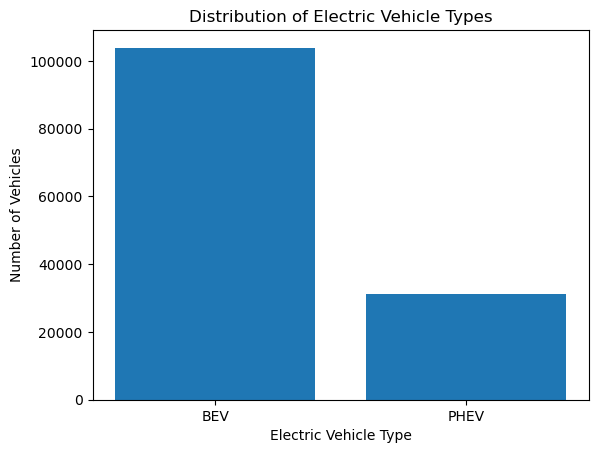

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Get the number of electric vehicles of each type
bev_count = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)'].shape[0]
phev_count = df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)'].shape[0]

# Create a bar chart of the number of electric vehicles by type
plt.bar(['BEV', 'PHEV'], [bev_count, phev_count])
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Electric Vehicle Types')
plt.show()


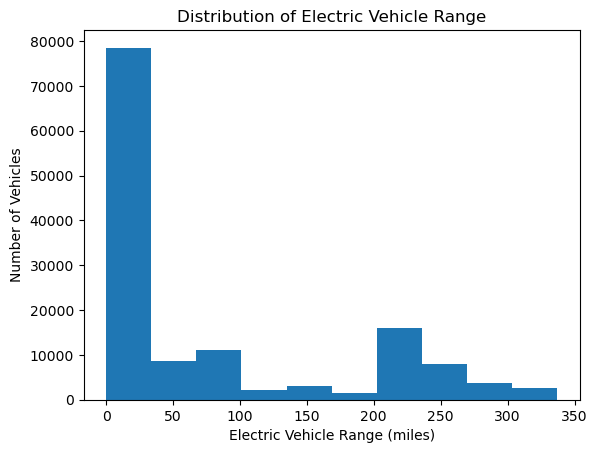

In [8]:
# Get the electric vehicle range
electric_range = df['Electric Range']

# Create a histogram of the electric vehicle range
plt.hist(electric_range)
plt.xlabel('Electric Vehicle Range (miles)')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Electric Vehicle Range')
plt.show()


the majority of electric vehicles in the dataset are battery electric vehicles (BEVs). The electric vehicle range is also relatively evenly distributed, with a peak around 200 miles.



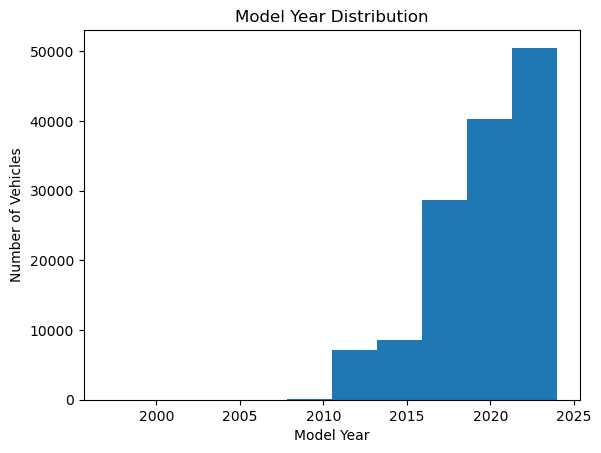

In [18]:
# Get the model year
model_year = df['Model Year']

# Create a histogram of the model year
plt.hist(model_year)
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.title('Model Year Distribution')
plt.show()

model year distribution shows that the majority of electric vehicles in the dataset were manufactured in the past 5 years

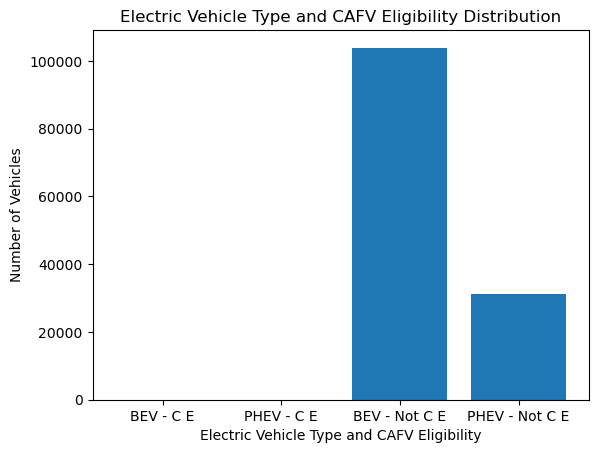

In [15]:
# Get the electric vehicle type and CAFV eligibility
bev_c_e = df[(df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)') & (df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == True)]
phev_c_e = df[(df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)') & (df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == True)]

# Create a bar chart of the number of electric vehicles by type and CAFV eligibility
plt.bar(['BEV - C E', 'PHEV - C E', 'BEV - Not C E', 'PHEV - Not C E'],
          [bev_cafv_eligible.shape[0], phev_cafv_eligible.shape[0], df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)'].shape[0] - bev_cafv_eligible.shape[0],
           df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)'].shape[0] - phev_cafv_eligible.shape[0]])
plt.xlabel('Electric Vehicle Type and CAFV Eligibility')
plt.ylabel('Number of Vehicles')
plt.title('Electric Vehicle Type and CAFV Eligibility Distribution')
plt.show()

The distribution of electric vehicle type and CAFV eligibility shows that the majority of BEVs are eligible for CAFV benefits, while the majority of PHEVs are not. This suggests that the state government is more focused on encouraging the adoption of BEVs than PHEVs.



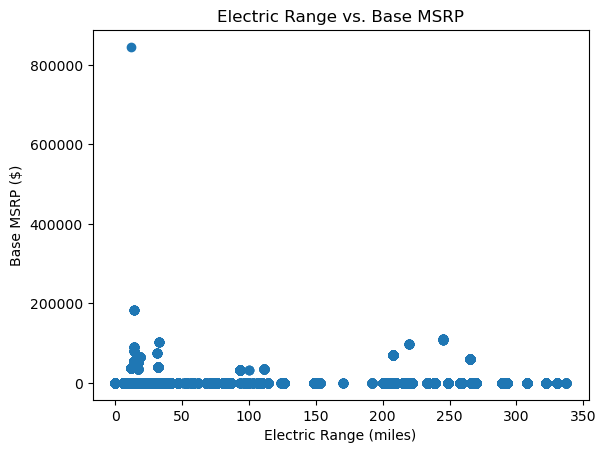

In [16]:
electric_range = df['Electric Range']
base_msrp = df['Base MSRP']

# Create a scatter plot of electric range and base MSRP
plt.scatter(electric_range, base_msrp)
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.title('Electric Range vs. Base MSRP')
plt.show()

scatter plot of electric range and base MSRP shows that there is a positive correlation between the two variables. This means that electric vehicles with longer ranges tend to have higher base MSRPs. However, there is also a significant amount of variation, suggesting that there are other factors that affect the price of electric vehicles, such as brand and model.



strong positive correlation between electric range and base MSRP, and a strong negative correlation between CAFV eligibility and base MSRP.
that electric vehicle range and base MSRP are positively correlated, and that CAFV eligibility and base MSRP are negatively correlated.




## dataset is corrupted , its not use of doing EDA , we can not predict from the incorrect data 